# Manipulating tabular data with Pandas

As we saw in a previous chapter, many kinds of neuroscience data can be
described as arrays. In particular, the analysis of many physiological signals,
such as BOLD, really benefits from organizing data in the form of arrays. But
there's another very beneficial way of organizing data. In neuroscience, we
often have datasets where several different variables were recorded for each
observation in the dataset. For example, each observation might be one subject
in a study, and for each subject, we record variables like the subject's sex and
age, various psychological measures, and also summaries of physiological
measurements using fMRI or other brain imaging modalities. In cases like this,
it's very common to represent the data in a two-dimensional table where each row
represents a different observation and each column represents a different
variable. Organizing our data this way allows us to manipulate the data through
queries and aggregation operations in a way that makes analysis much easier.
Because this type of organization is so simple and useful, it's often called
"tidy" data (a more technical name, for readers with an acquaintance with
databases, is the *third normal form*, or 3NF). This is also a very general way
of organizing data in many different applications, ranging from scientific
research to website logs, and administrative data collected in the operations of
various organizations. As you will see later in the book, it is also a natural
input to further analysis. For example, with the machine-learning methods that
you will see in {numref}`sklearn`. For this reason, tools that analyze tidy
tabular data play a central role in data science across these varied
applications. Here, we'll focus on a popular Python library that analyzes this
kind of data: "Pandas". Pandas is not only the plural form of an exceedingly
cute animal you can use as the mascot for your software library but also an
abbreviation of "panel data", which is another name for data that is stored in
two-dimensional tables of this sort.

An example should help demonstrate how Pandas is used. Let's consider a
diffusion MRI dataset. In this dataset, diffusion MRI data were collected from
76 individuals ages 6 - 50. Let's start with the subjects and their
characteristics.

We import `pandas` the usual way. Importing it as `pd` is also an oft-used
convention, just like `import numpy as np`:

In [1]:
import pandas as pd

Pandas knows how to take sequences of data and organize them into tables. For
example, the following code creates a table that has three columns, with four
values in each column.

In [4]:
my_df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3'],
                      'C': ['C0', 'C1', 'C2', 'C3']})

It's easy to look at all of the data in such a small table by printing out the values in the table.

In [5]:
my_df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


The Pandas library also knows how to read data from all kinds of sources. For
example, it can read data directly from a comma-separated values file (".csv")
stored on our computer, or somewhere on the internet. The CSV format is a good
format for storing tabular data. You can write out the values in a table, making
sure each row contains the same number of values. Values within a row are
separated from one another by commas (hence the name of the format). To make the
data more comprehensible, it's common to add a header row. That is, the first
row should contain labels (or column names) that tell us what each value in that
column means. We often also have one column that uniquely identifies each one of
the observations (e.g., the unique ID of each subject), which can come in handy.

Here, we will point to data that was collected as part of a study of life span
changes in brain tissue properties [(Yeatman et al., 2014)](https://doi.org/10.1038/ncomms5932). 
The data is stored in a file that contains a first row with the labels of the variables:
`subjectID`, `Age`, `Gender`, `Handedness`, `IQ`, `IQ_Matrix`, and `IQ_Vocab`.
The first of these labels is an identifier for each subject. The second is the
age, stored as an integer. The third is the gender of the subject, stored as a
string value ("Male" or "Female"), the fourth is handedness ("Right"/"Left"),
the fifth is the IQ (also a number) and the sixth and seventh are sub-scores of
the total IQ score (numbers as well).

We point the Pandas `read_csv` function directly to a URL that stores the data
(though we could also point to a CSV file stored on our computer!), as part of
the [AFQ-Browser project](https://yeatmanlab.github.io/AFQ-Browser/). We also
give Pandas some instructions about our data, including which columns we would
like to use; how to interpret values that should be marked as null values (in
this case, the string "NaN", which stands for "not a number"); and which columns
in the data we want to designate as the index (i.e., the column that uniquely
identifies each row in our dataset). In this case, our index is the first column
(`index_col=0`), corresponding to our unique subject identifier.

All of the arguments below (except for the URL to the file) are optional. Also,
`read_csv` has dozens of other optional arguments we could potentially use to
exert very fine-grained control over how our data file is interpreted. One
benefit of this flexibility is that we aren't restricted to reading only from
CSV files. Despite the name of the function, `read_csv` can be used to read data
from a wide range of well-structured plain-text formats. And beyond `read_csv`,
Pandas also has support for many other formats, via functions like `read_excel`,
`read_stata`, and so on.

In [6]:
subjects = pd.read_csv(
   "https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv",
   usecols=[1,2,3,4,5,6,7],
   na_values="NaN", index_col=0)

The variable `subjects` now holds a two-dimensional table of data. This variable
is an instance of an object called a `DataFrame` (often abbreviated to DF). A
`DataFrame` is similar to the numpy array objects that you saw in the
previous chapter, in that it's a structured container for data. But it differs
in several key respects. For one thing, a `DataFrame` is limited to 2 dimensions
(a Numpy array can have arbitrarily many dimensions). For another, a `DataFrame`
stores a lot more metadata -- data about the data. To see what this means, we
can examine some of the data as it's stored in our `subjects` variable. The
`.head()` method lets us see the first few rows of the table:

In [7]:
subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab
subjectID,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0
subject_001,31,Male,NaN,129.0,58.0,74.0
subject_002,18,Female,NaN,130.0,63.0,70.0
subject_003,28,Male,Right,NaN,NaN,NaN
subject_004,29,Male,NaN,NaN,NaN,NaN


A few things to notice about this table: first, in contrast to what we saw with
Numpy arrays, the DataFrame tells us about the meaning of the data: each column
has a label (or name). Second, in contrast to a Numpy array, our DF is
*heterogeneously typed*: it contains a mixture of different kinds of variables.
`Age` is an integer variable; `IQ` is a floating point (we know this because,
even though the items have integer values, they indicate the decimal); and
`Gender` and `Handedness` both contain string values.

We might also notice that some variables include values of `NaN`, which are now
designated as null values -- values that should be ignored in calculations. This
is the special value we use whenever a cell lacks a valid value (due to absent
or incorrect measurement). For example, it's possible that `subject_003` and
`subject_004` didn't undergo IQ testing, so we don't know what the values for
the variables `IQ`, `IQ_Matrix`, and `IQ_Vocab` should be in these rows.

## Summarizing DataFrames

Pandas provides us with a variety of useful functions for data summarization.
The `.info()` function tells us more precisely how much data we have and how the
different columns of the data are stored. It also tells us how many non-null
values are stored for every column.

In [8]:
subjects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, subject_000 to subject_076
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         77 non-null     int64  
 1   Gender      76 non-null     object 
 2   Handedness  66 non-null     object 
 3   IQ          63 non-null     float64
 4   IQ_Matrix   63 non-null     float64
 5   IQ_Vocab    63 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.2+ KB


This should mostly make sense. The variables that contain string values, Gender and Handedness, are stored as "object" types. This is because they contain a
mixture of strings, such as `"Male"`, `"Female"`, `"Right"` or `"Left"` and
values that are considered numerical: `NaN`s. The `subjectID` column has a
special interpretation as the index of the array. We'll use that in just a
little bit.

Another view on the data is provided by a method called `describe`, which
summarizes the statistics of each of the columns of the matrix that has
numerical values, by calculating the minimum, maximum, mean, standard deviation, and quantiles of the values in each of these columns.

In [9]:
subjects.describe()

,Age,IQ,IQ_Matrix,IQ_Vocab
count,77.000000,63.000000,63.000000,63.000000
mean,18.961039,122.142857,60.539683,64.015873
std,12.246849,12.717599,7.448372,8.125015
min,6.000000,92.000000,41.000000,36.000000
25%,9.000000,114.000000,57.000000,60.000000
50%,14.000000,122.000000,61.000000,64.000000
75%,28.000000,130.000000,64.500000,70.000000
max,50.000000,151.000000,76.000000,80.000000


The NaN values are ignored in this summary, but the number of non-NaN values is
given in a "count" row that tells us how many values from each column were used
in computing these statistics. It looks like 14 subjects in this data did not
have measurements of their IQ.

## Indexing into DataFrames

We've already seen in previous chapters how indexing and slicing let us choose
parts of a sequence or an array. Pandas DataFrames support a variety of
different indexing and slicing operations. Let's start with the selection of
observations, or rows. In contrast to Numpy arrays, we can't select rows in a
DataFrame with numerical indexing. The code `subjects`[0]` will usually raise an
error (the exception is if we named one of our columns `0`, but that would be
bad practice).

One way to select rows from the data is to use the index column of the array.
When we loaded the data from a file, we asked to designate the `subjectID` column
as the index column for this array. This means that we can use the values in
this column to select rows using the `loc` attribute of the DataFrame object For
example:

In [9]:
subjects.loc["subject_000"]

Age              20
Gender         Male
Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
IQ_Vocab       77.0
Name: subject_000, dtype: object

This gives us a new variable that contains only data for this subject.

Notice that `.loc` is a special kind of object attribute, which we index
directly with the square brackets. This kind of attribute is called an
*indexer*. This indexer is label-based, which means it expects us to pass the
labels (or names) of the rows and columns we want to access. But often, we don't
know what those labels are, and instead, only know the numerical indices of our
targets. Fortunately, Pandas provides an `.iloc` indexer for that purpose:

In [10]:
subjects.iloc[0]

Age              20
Gender         Male
Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
IQ_Vocab       77.0
Name: subject_000, dtype: object

The above returns the same data as before, but now we're asking for the row at
position `0`, rather than the row with label `"subject_000"`.

You might find yourself wondering why only passed a single index to `.loc` and
`.iloc`, given that our table has two dimensions. The answer is that it's just
shorthand. In the above code, `subjects.iloc[0]` is equivalent to this:

In [11]:
display(subjects.iloc[0, :])

Age              20
Gender         Male
Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
IQ_Vocab       77.0
Name: subject_000, dtype: object

You might remember the `:` syntax from the Numpy section. Just as in Numpy, the
colon `:` stands for "all values". And just like in Numpy, if we omit the second
dimension, Pandas implicitly assumes we want all of the values (i.e., the whole
column). And *also* just like in Numpy, we can use the slicing syntax to
retrieve only some of the elements (slicing):

In [12]:
subjects.iloc[0, 2:5]

Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
Name: subject_000, dtype: object

The `.iloc` and `.loc` indexers are powerful and prevent ambiguity, but they
also require us to type a few more characters. In cases where we just want to
access one of the `DataFrame` columns directly, Pandas provides the following
helpful shorthand:

In [13]:
subjects["Age"]

subjectID
subject_000    20
subject_001    31
subject_002    18
subject_003    28
subject_004    29
               ..
subject_072    40
subject_073    50
subject_074    40
subject_075    17
subject_076    17
Name: Age, Length: 77, dtype: int64

In [14]:
age = subjects["Age"]

This assigns the values in the `"Age"` column to the `age` variable. The new
variable is no longer a Pandas `DataFrame`; it's now a Pandas `Series`! A Series
stores a 1-dimensional series of values (it's conceptually similar to a
1-dimensional Numpy array) and under the hood, every Pandas DataFrame is a
collection of `Series` (one per column). The `age` Series object also retains
the index from the original DataFrame.

Series behave very similarly to DataFrames, with some exceptions. One exception
is that, because a Series only has one dimension, we can index them on the rows
without explicitly using `loc` or `iloc` (though they still work fine). So, the
following 2 lines both retrieve the same value.

In [15]:
age['subject_072']

40

In [16]:
age[74]

40

We'll see other ways that Series objects are useful in just a bit. We can also
select more than one column to include. This requires indexing with a list of column names and will create a new DataFrame

In [17]:
subjects[["Age", "IQ"]]

,Age,IQ
subjectID,,
subject_000,20,139.0
subject_001,31,129.0
subject_002,18,130.0
subject_003,28,NaN
subject_004,29,NaN
...,...,...
subject_072,40,134.0
subject_073,50,NaN
subject_074,40,122.0


We can also combine indexing operations with `loc`, to select a particular
combination of rows and columns. For example:

In [18]:
subjects.loc["subject_005":"subject_010", ["Age", "Gender"]]

,Age,Gender
subjectID,,
subject_005,36,Male
subject_006,39,Male
subject_007,34,Male
subject_008,24,Female
subject_009,21,Male
subject_010,29,Female


A cautionary note: beginners often find indexing in Pandas confusing—partly
because there are different `.loc` and `.iloc` indexers, and partly because many
experienced Pandas users *don't* always use these explicit indexers, and instead
opt for shorthand like `subjects["Age"]`. It may take a bit of time for all
these conventions to sink through, but don't worry! With a bit of experience, it
quickly becomes second nature. If you don't mind typing a few extra characters,
the best practice (which, admittedly, we won't always follow ourselves in this
book) is to always be as explicit as possible -— i.e., to use `.loc` and
`.iloc`, and to always include both dimensions when indexing a `DataFrame`. So,
for example, we would write `subjects.loc[:, 'age']` rather than the shorthand
`subjects['age']`.

## Computing with DataFrames

Like Numpy arrays, Pandas DataFrame objects have many methods for computing on the data that is in the DataFrame. In contrast to arrays, however, the
dimensions of the DataFrame always mean the same thing: the columns are
variables and the rows are observations. This means that some kinds of
computations only make sense when done along one dimension, the rows, and not
along the other. For example, it might make sense to compute the average IQ of
the entire sample, but it wouldn't make sense to average a single subject's age
and IQ scores.

Let's see how this plays out in practice. For example, like the Numpy array
object, DataFrame objects have a `mean` method. However, in contrast to the
Numpy array, when `mean` is called on the DataFrame, it defaults to take the mean
of each column separately. In contrast to Numpy arrays, different columns can
also have different types. For example, the `"Gender"` column is full of strings,
and it doesn't make sense to take the mean of strings, so we have to explicitly
pass to the `mean` method an argument that tells it to only try to average the
columns that contain numeric data.

In [19]:
means = subjects.mean(numeric_only=True)
print(means)

Age           18.961039
IQ           122.142857
IQ_Matrix     60.539683
IQ_Vocab      64.015873
dtype: float64


This operation also returns to us an object that makes sense: this is a Pandas
`Series` object, with the variable names of the original `DataFrame` as its
index, which means that we can extract a value for any variable
straightforwardly. For example:

In [20]:
means["Age"]

18.961038961038962

### Arithmetic with DataFrame columns

As you saw above, a single DataFrame column is a Pandas Series object. We can do
arithmetic with Series objects in a way that is very similar to arithmetic in
Numpy arrays. That is, when we perform arithmetic between a Series object and a
number, the operation is performed separately for each item in the series. For
example, let's compute a standardized z-score for each subject's age, relative
to the distribution of ages in the group. First, we calculate the mean and
standard deviation of the ages. These are single numbers:

In [21]:
age_mean = subjects["Age"].mean()
age_std = subjects["Age"].std()
print(age_mean)
print(age_std)

18.961038961038962
12.24684874445319


Next, we perform array-scalar computations on the `"`Age"` column or Series. We
subtract the mean from each value and divide it by the standard deviation:

In [22]:
(subjects["Age"] - age_mean ) / age_std

subjectID
subject_000    0.084835
subject_001    0.983025
subject_002   -0.078472
subject_003    0.738064
subject_004    0.819718
                 ...   
subject_072    1.717908
subject_073    2.534445
subject_074    1.717908
subject_075   -0.160126
subject_076   -0.160126
Name: Age, Length: 77, dtype: float64

One thing that Pandas DataFrames allow us to do is to assign the results of an
arithmetic operation on one of its columns into a new column that gets
incorporated into the DataFrame. For example, we can create a new column that we
will call `"Age_standard"` and will contain the standard scores for each subject's
age:

In [23]:
subjects["Age_standard"] = (subjects["Age"] - age_mean ) / age_std

subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age_standard
subjectID,,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0,0.084835
subject_001,31,Male,NaN,129.0,58.0,74.0,0.983025
subject_002,18,Female,NaN,130.0,63.0,70.0,-0.078472
subject_003,28,Male,Right,NaN,NaN,NaN,0.738064
subject_004,29,Male,NaN,NaN,NaN,NaN,0.819718


You can see that Pandas has added a column to the right with the new variable
and its values in every row.

#### Exercise

In addition to array-scalar computations, we can also perform arithmetic between columns/Series (akin to array-array computations). Compute a new column in the DataFrame called `"IQ_sub_diff"`, which contains in every row the difference between the subject's `"IQ_Vocab"` and `"IQ_Matrix"` columns. What happens in the cases where one (or both) of these is a null value?

### Selecting data

Putting these things together, we will start using Pandas to filter the dataset
based on the properties of the data. To do this, we can use logical operations to
find observations that fulfill certain conditions and select them. This is
similar to logical indexing that we saw in Numpy arrays (in
{numref}`boolean_indexing_numpy`). It relies on the fact that, much as we can
use a boolean array to index into Numpy arrays, we can also use a boolean
`Series` object to index into a Pandas `DataFrame`. For example, let's say that
we would like to separately analyze children under 10 and other subjects. First,
we define a column that tells us for every row in the data whether the `"Age"`
variable has a value that is smaller than 10:

In [24]:
subjects["age_less_than_10"] = subjects["Age"] < 10
print(subjects["age_less_than_10"])

subjectID
subject_000    False
subject_001    False
subject_002    False
subject_003    False
subject_004    False
               ...  
subject_072    False
subject_073    False
subject_074    False
subject_075    False
subject_076    False
Name: age_less_than_10, Length: 77, dtype: bool


This column is also a Pandas `Series` object, with the same index as the
original `DataFrame` and boolean values (`True`/`False`). To select from the
original `DataFrame` we use this `Series` object to index into the `DataFrame`,
providing it within the square brackets used for indexing:

In [25]:
subjects_less_than_10 = subjects[subjects["age_less_than_10"]]
subjects_less_than_10.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age_standard,age_less_than_10
subjectID,,,,,,,,
subject_024,9,Male,Right,142.0,72.0,73.0,-0.813355,True
subject_026,8,Male,Right,125.0,67.0,61.0,-0.895009,True
subject_028,7,Male,Right,146.0,76.0,73.0,-0.976663,True
subject_029,8,Female,Right,107.0,57.0,51.0,-0.895009,True
subject_033,9,Male,Right,132.0,64.0,71.0,-0.813355,True


As you can see, this gives us a new `DataFrame` that has all of the columns of
the original `DataFrame`, including the ones that we added through computations
that we did along the way. It also retains the index column of the original
array and the values that were stored in this column. But several observations
were dropped along the way -- those for which the `"Age"` variable was 10 or
larger. We can verify that this is the case by looking at the statistics of the
remaining data:

In [26]:
subjects_less_than_10.describe()

,Age,IQ,IQ_Matrix,IQ_Vocab,Age_standard
count,25.000000,24.00000,24.000000,24.000000,25.000000
mean,8.320000,126.62500,62.541667,66.625000,-0.868880
std,0.802081,14.48181,8.607273,8.026112,0.065493
min,6.000000,92.00000,41.000000,50.000000,-1.058316
25%,8.000000,119.00000,57.750000,61.750000,-0.895009
50%,8.000000,127.50000,63.500000,68.000000,-0.895009
75%,9.000000,138.00000,68.000000,72.250000,-0.813355
max,9.000000,151.00000,76.000000,80.000000,-0.813355


This checks out. The maximum value for Age is 9, and we also have only 25
remaining subjects, presumably because the other subjects in the DataFrame had
ages of 10 or larger.

#### Exercises

Series objects have a `notnull` method that returns a Boolean Series object that is `True` for the cases that are not null values (e.g., NaN).
Use this method to create a new DataFrame that has only the subjects for which IQ measurements were obtained
Is there a faster way to create this DataFrame with just one function call?

### Selecting combinations of groups: Using a MultiIndex

Sometimes we want to select groups made up of combinations of variables. For
example, we might want to analyze the data based on a split of the data both by
gender and by age. One way to do this is by changing the index of the DataFrame
to be made up of more than one column. This is called a "MultiIndex" DataFrame.
A MultiIndex gives us direct access, by indexing, to all the different groups in
the data, across different kinds of splits. We start by using the `.set_index()`
method of the DataFrame object, to create a new kind of index for our dataset.
This index uses both the gender and the age group to split the data into four
groups: the two gender groups `"Male"`/`"Female"` and within each one of these
participants aged below and above 10:

In [27]:
multi_index = subjects.set_index(["Gender", "age_less_than_10"])
multi_index.head()

Age Handedness     IQ  IQ_Matrix  IQ_Vocab  \
Gender age_less_than_10                                               
Male   False              20        NaN  139.0       65.0      77.0   
       False              31        NaN  129.0       58.0      74.0   
Female False              18        NaN  130.0       63.0      70.0   
Male   False              28      Right    NaN        NaN       NaN   
       False              29        NaN    NaN        NaN       NaN   

                         Age_standard  
Gender age_less_than_10                
Male   False                 0.084835  
       False                 0.983025  
Female False                -0.078472  
Male   False                 0.738064  
       False                 0.819718

This is curious: the two first columns are now both index columns. That means
that we can select rows of the DataFrame based on these two columns. For
example, we can subset the data down to only the subjects identified as males under 10 and then take the mean of that group

In [28]:
multi_index.loc["Male", True].mean(numeric_only=True)

Age               8.285714
IQ              125.642857
IQ_Matrix        62.071429
IQ_Vocab         66.000000
Age_standard     -0.871679
dtype: float64

Or do the same operation, but only with those subjects identified as females
over the age of 10:

In [29]:
multi_index.loc["Female", False].mean(numeric_only=True)

Age              22.576923
IQ              117.095238
IQ_Matrix        57.619048
IQ_Vocab         61.619048
Age_standard      0.295250
dtype: float64

While useful, this can also become a bit cumbersome if you want to repeat this
many times for every combination of age group and sex. And because dividing up a
group of observations based on combinations of variables is such a common
pattern in data analysis, there's a built-in way to do it. Let's look at that
next.

### Split-apply-combine

A recurring pattern we run into when working with tabular data is the following:
we want to (1) take a dataset and **split** it into subsets; (2) independently
**apply** some operation to each subset; and (3) **combine** the results of all
the independent applications into a new dataset.  This pattern has a simple,
descriptive (if boring) name: "split-apply-combine". Split-apply-combine is such
a powerful and common strategy that Pandas implements extensive functionality
designed to support it. The centerpiece is a `DataFrame` method called `.groupby()`
that, as the name suggests, groups (or splits) a `DataFrame` into subsets.

For example, let's split the data by the `"Gender"` column:

In [30]:
gender_groups = subjects.groupby("Gender")

The output from this operation is a `DataFrameGroupBy` object. This is a special
kind of object that knows how to do many of the things that regular DataFrame
objects can, but also internally groups parts of the original DataFrame into
distinct subsets. This means that we can perform many operations just as if we
were working with a regular DataFrame, but implicitly, those operations will be
applied to each subset, and not to the whole DataFrame.

For example, we can calculate the mean for each group:

In [31]:
gender_groups.mean()

,Age,IQ,IQ_Matrix,IQ_Vocab,Age_standard,age_less_than_10
Gender,,,,,,
Female,18.351351,120.612903,59.419355,63.516129,-0.049783,0.297297
Male,18.743590,123.625000,61.625000,64.500000,-0.017756,0.358974


The output of this operation is a DataFrame that contains the summary with the
original DataFrame's `"Gender"` variable as the index variable. This means that
we can get the mean age for one of the Gender groups through a standard
DataFrame indexing operation:

In [32]:
gender_groups.mean().loc["Female", "Age"]

18.35135135135135

We can also call `.groupby()` with more than one column. For example, we can
repeat the split of the group by age groups *and* sex:

In [33]:
gender_and_age_groups = subjects.groupby(["Gender", "age_less_than_10"])

As before, the resulting object is a `DataFrameGroupBy` object, and we can call
the `.mean()` method on it

In [34]:
gender_and_age_groups.mean()

Age          IQ  IQ_Matrix   IQ_Vocab  \
Gender age_less_than_10                                                
Female False             22.576923  117.095238  57.619048  61.619048   
       True               8.363636  128.000000  63.200000  67.500000   
Male   False             24.600000  122.055556  61.277778  63.333333   
       True               8.285714  125.642857  62.071429  66.000000   

                         Age_standard  
Gender age_less_than_10                
Female False                 0.295250  
       True                 -0.865317  
Male   False                 0.460442  
       True                 -0.871679

The resulting object is a MultiIndex DataFrame, but rather than worry about how
to work with MultiIndexes, we'll just use `.iloc` to retrieve the first
combination of gender and age values in the above DataFrame.

In [35]:
gender_and_age_groups.mean().iloc[0]

Age              22.576923
IQ              117.095238
IQ_Matrix        57.619048
IQ_Vocab         61.619048
Age_standard      0.295250
Name: (Female, False), dtype: float64

We could also have used `.reset_index()`, and then applied boolean operations to
select specific subsets of the data, just as we did earlier in this section).

#### Exercise

Use any of the methods you saw above to calculate the average IQ of right-handed male subjects older than 10 years.


## Joining different tables

Another kind of operation that Pandas has excellent support for is data joining
(or merging, or combining...). For example, in addition to the table we've been
working with so far, we also have diffusion MRI data that was collected in the
same individuals. Diffusion MRI uses magnetic field gradients to make the
measurement in each voxel sensitive to the directional diffusion of water in
that part of the brain. This is particularly useful in the brain's white matter,
where diffusion along the length of large bundles of myelinated axons is much
larger than across their boundaries. This fact is used to guide computational
tractography algorithms that generate estimates of the major white matter
pathways that connect different parts of the brain. In addition, in each voxel, we can fit a model of diffusion that tells us something about the properties
of the white matter tissue within the voxel.

In the dataset that we're analyzing here, the diffusion data were analyzed to
extract tissue properties along the length of 20 major white matter pathways in
the brain. In this analysis method, called tractometry, each major pathway is
divided into 100 nodes, and in each node, different kinds of tissue properties
are sampled. For example, the fractional anisotropy (FA) is calculated in the
voxels that are associated with this node. This means that for every bundle, in
every subject, we have exactly 100 numbers representing FA. This data can
therefore also be organized in a tabular format. Let's see what that looks like
by reading this table as well. For simplicity, we focus only on some of the
columns in the table (in particular, there are some other tissue properties
stored in the CSV file, which you can explore on your own, by omitting the
`usecols` argument)

In [10]:
nodes = pd.read_csv(
    'https://yeatmanlab.github.io/AFQBrowser-demo/data/nodes.csv',
    index_col="subjectID",
    usecols=["subjectID", "tractID", "nodeID", "fa"])

In [11]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154000 entries, subject_000 to subject_076
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tractID  154000 non-null  object 
 1   nodeID   154000 non-null  int64  
 2   fa       152326 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ MB


In [12]:
nodes.head()

,tractID,nodeID,fa
subjectID,,,
subject_000,Left Thalamic Radiation,0,0.183053
subject_000,Left Thalamic Radiation,1,0.247121
subject_000,Left Thalamic Radiation,2,0.306726
subject_000,Left Thalamic Radiation,3,0.343995
subject_000,Left Thalamic Radiation,4,0.373869


This table is much, much larger than our subjects table (154,000 rows!). This is
because for every subject and every tract, there are 100 nodes and FA is
recorded for each one of these nodes.

Another thing to notice about this table is that it shares one column in common
with the subjects table that we looked at before: they both have an index column
called 'subjectID'. But in this table, the index values are not unique to a
particular row. Instead, each row is uniquely defined by a combination of three
different columns: the subjectID, and the tractID, which identifies the white matter
pathway (for example, in the first few rows of the table, `"Left Thalamic
Radiation"`) as well as a node ID, which identifies how far along this pathway these
values are extracted from. This means that for each individual subject, there
are multiple rows. If we index using the `subjectID` value, we can see just how
many:

In [13]:
nodes.loc["subject_000"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, subject_000 to subject_000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tractID  2000 non-null   object 
 1   nodeID   2000 non-null   int64  
 2   fa       1996 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 62.5+ KB


This makes sense: 20 major white matter pathways were extracted in the brain of
each subject and there are 100 nodes in each white matter pathway, so there are
a total of 2,000 rows of data for each subject.

We can ask a lot of questions with this data. For example, we might wonder
whether there are sex and age differences in the properties of the white matter.
To answer these kinds of questions, we need to somehow merge the information
that's currently contained in two different tables. There are a few ways to do
this, and some are simpler than others. Let's start by considering the simplest
case, using artificial data, and then we'll come back to our real dataset.

Consider the following three tables, created the way we saw at the very
beginning of this chapter:

In [14]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

Each one of these tables has the same columns: `'A', 'B', 'C'` and `'D'` and
they each have their own distinct set of index values. This kind of data could
arise if the same kinds of measurements were repeated over time. For example, we
might measure the same air quality variables every week, and then store
each week's data in a separate table, with the dates of each measurement as the
index.

One way to merge the data from such tables is using the Pandas `concat` function
(an abbreviation of *concatenation*, which is the chaining together of different
elements).

In [15]:
frames = [df1, df2, df3]

result = pd.concat(frames)

The `result` table here would have the information that was originally stored in
the three different tables, organized in the order of their concatenation.

In [16]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In this case, all of our individual DataFrames have the same columns, but
different row indexes, so it's very natural to concatenate them along the row
axis, as above. But suppose we want to merge `df1` with the following new
DataFrame, `df4`:

In [17]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D4', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])

Now, `df4` has index values `2` and `3` in common with `df1`. It also has
columns `'B'` and `'D'` in common with `df1`. But it also has some new index
values (`6` and `7`) and a new column (`'F'`) that didn't exist in `df1`. That
means that there's more than one way to put together the data from `df1` and
`df4` The safest thing to do would be to preserve as much of the data as
possible, and that's what the `concat` function does per default:

In [18]:
pd.concat([df1, df4])

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D4,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In this case, the new merged table contains all of the rows in `df1` followed by
all of the rows in `df4`. The columns of the new table are a combination of the
columns of the two tables. Wherever possible, the new table will merge the columns into one column. This is true for columns that exist in the two
DataFrame objects. For example, column `B` and column `D` exist in both of
the inputs. In cases where this isn't possible (because the column doesn't exist
in one of the inputs), Pandas preserves the input values and adds NaNs, which
stand for missing values, into the table. For example, `df1` didn't have a
column called `F`, so the first row in the resulting table has a NaN in that
column. Similarly, `df4` didn't have an `'A'` column, so the 5th row in the
table has a NaN for that column.

### Merging tables

There are other ways we could combine data with `concat`; for example, we could
try concatenating only along the column axis (i.e.,s stacking DataFrames along
their width, to create an increasingly wide result. You can experiment with that
by passing `axis=1` to `concat` and seeing what happens. But rather than belabor
the point here, let's come back to our real DataFrames, which imply a more
complicated merging scenario.

You might think we could just use `concat` again to combine our `subjects` and
`nodes` datasets. But there are some complications. For one thing, our two
DataFrames contain no common columns. Naively concatenating them along the row
axis, as in our first `concat` example above, would produce a rather
strange-looking result (feel free to try it out). But concatenating along the
column axis is also tricky because we have multiple rows for each subject in
`nodes`, but only one row per subject in `subjects`. It turns out that `concat`
doesn't know how to deal with this type of data, and would give us an error.
Instead, we need to use a more complex merging strategy that allows us to
specify exactly *how* we want the merge to proceed. Fortunately, we can use the
pandas `merge` function for this. `merge` is smarter than `concat`; it
implements several standard joining algorithms commonly used in computer
databases (you might have heard of 'inner', 'outer', or 'left' joins; these are
the kinds of things we're talking about here). When we call `merge`, we pass in
the two DataFrames we want to merge, and then a specification that controls how
the merging takes place. In our case, we indicate that we want to merge on the
index for both the left and right DataFrames (hence `left_index=True` and
`right_index=True`). But we could also join on one or more columns in the
DataFrames, in which case we would have passed named columns to the `on` (or
`left_on` and `right_on` columns).

In [45]:
joined = pd.merge(nodes, subjects, left_index=True, right_index=True)
joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154000 entries, subject_000 to subject_076
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tractID           154000 non-null  object 
 1   nodeID            154000 non-null  int64  
 2   fa                152326 non-null  float64
 3   Age               154000 non-null  int64  
 4   Gender            152000 non-null  object 
 5   Handedness        132000 non-null  object 
 6   IQ                126000 non-null  float64
 7   IQ_Matrix         126000 non-null  float64
 8   IQ_Vocab          126000 non-null  float64
 9   Age_standard      154000 non-null  float64
 10  age_less_than_10  154000 non-null  bool   
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 13.1+ MB


The result, as we see above, is a table, where each row corresponds to one of
the rows in the original `nodes` table, but adds in the values from the
`subjects` table that belong to that subject. This means that we can use these
variables to split up the diffusion MRI data and analyze it separately by (for
example) age, as before, using the split-apply-combine pattern. Here, we define
our subgroups based on unique combinations of age (less than or greater
than 10), tract ID, and node ID.

In [46]:
age_groups = joined.groupby(["age_less_than_10", "tractID", "nodeID"])

Now applying the `mean` method of the `DataFrameGroupBy` object will create a
separate average for each one of the nodes in each white matter pathway,
identified through the "tractID" and "nodeID" values, across all the subjects in
each group.

In [47]:
group_means = age_groups.mean()
group_means.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4000 entries, (False, 'Callosum Forceps Major', 0) to (True, 'Right Uncinate', 99)
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fa            4000 non-null   float64
 1   Age           4000 non-null   float64
 2   IQ            4000 non-null   float64
 3   IQ_Matrix     4000 non-null   float64
 4   IQ_Vocab      4000 non-null   float64
 5   Age_standard  4000 non-null   float64
dtypes: float64(6)
memory usage: 200.3+ KB


For example, the first row above shows us the mean value for each variable
across all subjects, for the node with ID 0, in the `Callosum Forceps Major`
tract. There are 4,000 rows in all, reflecting 2 age groups x 20 tracts x 100
nodes. Let's select just one of the white matter pathways, and assign each age
group's rows within that pathway to a separate variable. This gives us two
variables, each with 100 rows (1 row per node). The index for this DataFrame is
a `MultiIndex`, which is why we pass tuples like `(False, "Left Cingulum
Cingulate")` to select from it.

In [48]:
below_10_means = group_means.loc[(False, "Left Cingulum Cingulate")]
above_10_means = group_means.loc[(True, "Left Cingulum Cingulate")]

We can then select just one of the columns in the table for further inspection.
For example, "fa". To visualize the 100 numbers in this series, we will use the
Matplotlib library's `plot` function (in the next chapter you will learn much
more about data visualization with Matplotlib). For an interesting comparison,
we also do all of these operations but selecting the other age group as well

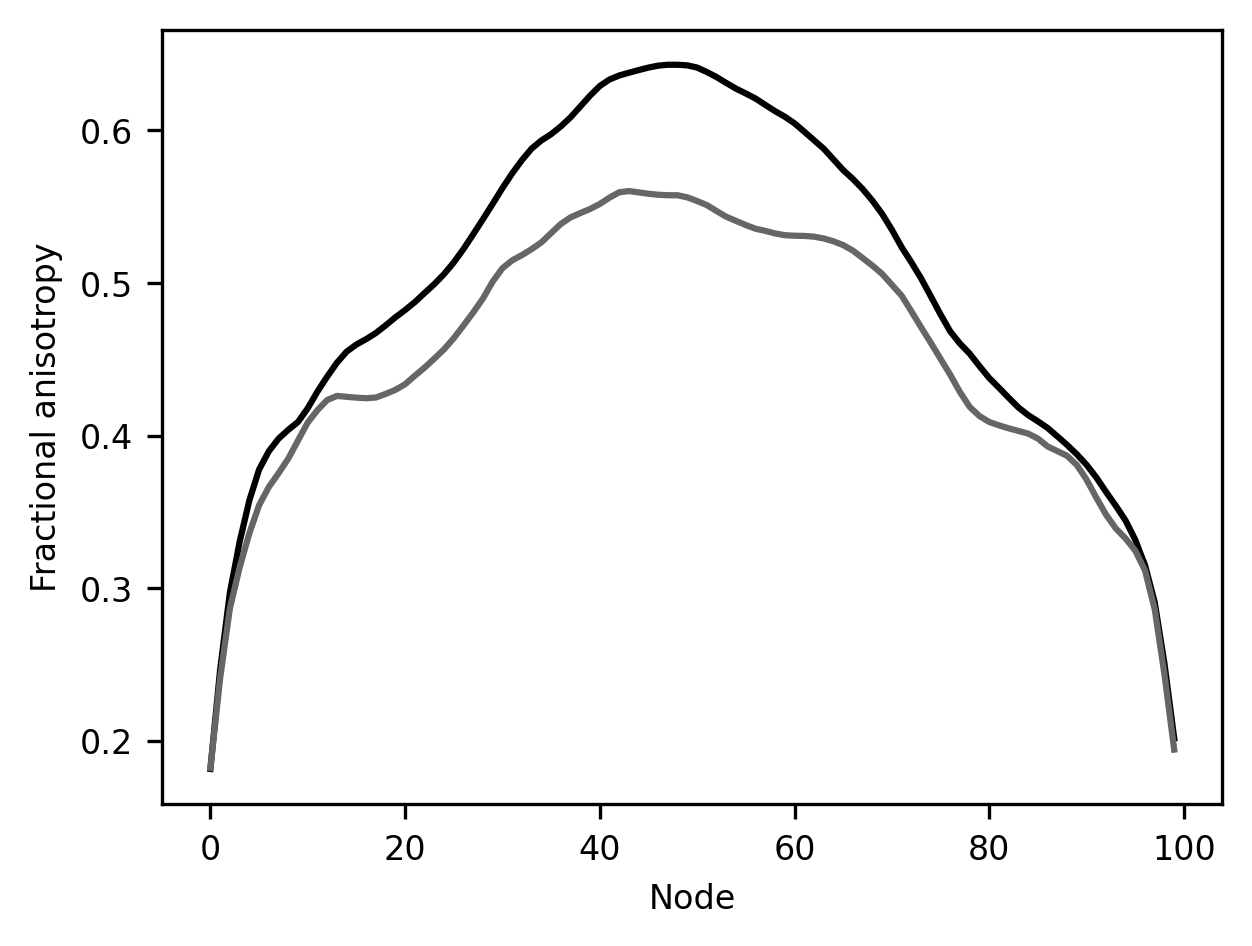

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(below_10_means["fa"])
ax.plot(above_10_means["fa"])
ax.set_xlabel("Node")
label = ax.set_ylabel("Fractional anisotropy")

This result is rather striking! In this part of the brain, there is a
substantial difference between younger children and all of the other subjects.
This is a part of the white matter where there is a significant amount of
development after age 10.

#### Exercises

How would you go about comparing the development of male and female subjects in this part of the brain? How would you compare younger children to the other subjects in other tracts?

To summarize, Pandas gives us a set of functionality to combine, query, and
summarize data stored in tabular format. You've already seen here how you get
from data stored in tables to a real scientific result. We'll come back to using Pandas later in the book in the context of data analysis, and you will see more
elaborate examples in which data can be selected using Pandas and then submitted
to further analysis in other tools.

### Pandas errors

Before we move on to the next topic, we would like to pause and discuss a few
patterns of errors that are unique to Pandas and are common enough in the daily
use of Pandas, that they are worth warning you about. One common pattern of
errors comes from a confusion between Series objects and DataFrame objects.
These are very similar, but they are not the same thing! For example, the Series
objects have a very useful `value_counts` method that creates a table with the
number of observations in the Series for every unique value. However, calling
this method on a DataFrame would raise a Python `AttributeError`, because it
doesn't exist in the DataFrame, only in the Series. Another common error comes
from the fact that many of the operations that you can do on DataFrames create a
new DataFrame as output, rather than changing the DataFrame in place. For
example, calling the following code:

In [50]:
subjects.dropna()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age_standard,age_less_than_10
subjectID,,,,,,,,
subject_007,34,Male,Right,115.0,66.0,51.0,1.227986,False
subject_009,21,Male,Right,124.0,63.0,64.0,0.166489,False
subject_010,29,Female,Right,130.0,60.0,73.0,0.819718,False
subject_011,31,Male,Right,128.0,64.0,67.0,0.983025,False
subject_012,28,Female,Left,129.0,68.0,64.0,0.738064,False
subject_013,20,Female,Right,129.0,61.0,71.0,0.084835,False
subject_014,21,Female,Right,116.0,55.0,63.0,0.166489,False
subject_015,20,Female,Left,119.0,59.0,63.0,0.084835,False
subject_018,12,Male,Right,118.0,57.0,63.0,-0.568394,False


would not change the `subjects` DataFrame! If you want to retain the result of this call, you will need to assign it to a new DataFrame:

In [19]:
subjects_without_na = subjects.dropna()

Or use the `inplace` keyword argument:

In [20]:
subjects.dropna(inplace=True)

This pattern of errors is particularly pernicious because you could continue working with the unchanged DataFrame for many more steps leading to confusing results down the line.

Finally, errors due to indexing are also common. This is because, as you saw
above, there are different ways to perform the same indexing operation, and, in
contrast to indexing in Numpy arrays, indexing by rows and by columns, or
indexing the order of a row (i.e., with `iloc`) does something rather different
than indexing with the row index (i.e., with `loc`).

*This tutorial was based on Chapter 9 of the [Neuroimaging and Data Science](https://neuroimaging-data-science.org/root.html) textbook.*